# rf210_angularconv
Convolution in cyclical angular observables theta, and
construction of p.d.f in terms of transformed angular
coordinates, e.g. cos(theta), the convolution
is performed in theta rather than cos(theta)

(require ROOT to be compiled with --enable-fftw3)

pdf(theta)    = ROOT.T(theta)          (x) gauss(theta)
pdf(cosTheta) = ROOT.T(acos(cosTheta)) (x) gauss(acos(cosTheta))




**Author:**  Clemens Lange, Wouter Verkerke (C version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:17 AM.</small></i>

In [1]:
import ROOT

Set up component pdfs
---------------------------------------

Define angle psi

In [2]:
psi = ROOT.RooRealVar("psi", "psi", 0, 3.14159268)

Define physics p.d.f T(psi)

In [3]:
Tpsi = ROOT.RooGenericPdf("Tpsi", "1+sin(2*@0)", [psi])

Define resolution R(psi)

In [4]:
gbias = ROOT.RooRealVar("gbias", "gbias", 0.2, 0.0, 1)
greso = ROOT.RooRealVar("greso", "greso", 0.3, 0.1, 1.0)
Rpsi = ROOT.RooGaussian("Rpsi", "Rpsi", psi, gbias, greso)

Define cos(psi) and function psif that calculates psi from cos(psi)

In [5]:
cpsi = ROOT.RooRealVar("cpsi", "cos(psi)", -1, 1)
psif = ROOT.RooFormulaVar("psif", "acos(cpsi)", [cpsi])

Define physics p.d.f. also as function of cos(psi): T(psif(cpsi)) = T(cpsi)

In [6]:
Tcpsi = ROOT.RooGenericPdf("T", "1+sin(2*@0)", [psif])

Construct convolution pdf in psi
--------------------------------------------------------------

Define convoluted p.d.f. as function of psi: M=[T(x)R](psi) = M(psi)

In [7]:
Mpsi = ROOT.RooFFTConvPdf("Mf", "Mf", psi, Tpsi, Rpsi)

[#1] INFO:Caching -- Changing internal binning of variable 'psi' in FFT 'Mf' from 100 to 930 to improve the precision of the numerical FFT. This can be done manually by setting an additional binning named 'cache'.


Set the buffer fraction to zero to obtain a ROOT.True cyclical
convolution

In [8]:
Mpsi.setBufferFraction(0)

Sample, fit and plot convoluted pdf (psi)
--------------------------------------------------------------------------------

Generate some events in observable psi

In [9]:
data_psi = Mpsi.generate({psi}, 10000)

[#1] INFO:Eval -- RooRealVar::setRange(psi) new range named 'refrange_fft_Mf' created with bounds [0,3.14159]
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Tpsi_Int[psi]) using numeric integrator RooIntegrator1D to calculate Int(psi)
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(Mf) creating new cache 0xa716550 with pdf Tpsi_CONV_Rpsi_CACHE_Obs[psi]_NORM_psi for nset (psi) with code 0
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(Mf) creating new cache 0xa883210 with pdf Tpsi_CONV_Rpsi_CACHE_Obs[psi]_NORM_psi for nset (psi) with code 0 from preexisting content.


Fit convoluted model as function of angle psi

In [10]:
Mpsi.fitTo(data_psi, PrintLevel=-1)

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(Mf) creating new cache 0xaaae880 with pdf Tpsi_CONV_Rpsi_CACHE_Obs[psi]_NORM_psi for nset (psi) with code 0 from preexisting content.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(Mf_over_Mf_Int[psi]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_Mf_over_Mf_Int[psi]_MfData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(Mf) creating new cache 0xac422e0 with pdf Tpsi_CONV_Rpsi_CACHE_Obs[psi] for nset () with code 1 from preexisting content.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Tpsi_Int[psi]) using numeric integrator RooIntegrator1D to calculate Int(psi)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating 

Plot cos(psi) frame with Mf(cpsi)

In [11]:
frame1 = psi.frame(Title="Cyclical convolution in angle psi")
data_psi.plotOn(frame1)
Mpsi.plotOn(frame1)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(Tpsi_Int[psi]) using numeric integrator RooIntegrator1D to calculate Int(psi)
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(Mf) creating new cache 0xae014b0 with pdf Tpsi_CONV_Rpsi_CACHE_Obs[psi]_NORM_psi for nset (psi) with code 0


Overlay comparison to unsmeared physics p.d.f ROOT.T(psi)

In [12]:
Tpsi.plotOn(frame1, LineColor="r")

[#1] INFO:NumericIntegration -- RooRealIntegral::init(Tpsi_Int[psi]) using numeric integrator RooIntegrator1D to calculate Int(psi)


Construct convolution pdf in cos(psi)
--------------------------------------------------------------------------

Define convoluted p.d.f. as function of cos(psi): M=[T(x)R](psif cpsi)) = M(cpsi:

Need to give both observable psi here (for definition of convolution)
and function psif here (for definition of observables, in cpsi)

In [13]:
Mcpsi = ROOT.RooFFTConvPdf("Mf", "Mf", psif, psi, Tpsi, Rpsi)

Set the buffer fraction to zero to obtain a ROOT.True cyclical
convolution

In [14]:
Mcpsi.setBufferFraction(0)

Sample, fit and plot convoluted pdf (cospsi)
--------------------------------------------------------------------------------

Generate some events

In [15]:
data_cpsi = Mcpsi.generate({cpsi}, 10000)

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(Mf) creating new cache 0xaec1590 with pdf Tpsi_CONV_Rpsi_CACHE_Obs[cpsi]_NORM_cpsi for nset (cpsi) with code 0 from preexisting content.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Tpsi_CONV_Rpsi_CACHE_Obs[cpsi]_NORM_cpsi_Int[cpsi]) using numeric integrator RooIntegrator1D to calculate Int(cpsi)
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(Mf) creating new cache 0xae90830 with pdf Tpsi_CONV_Rpsi_CACHE_Obs[cpsi]_NORM_cpsi for nset (cpsi) with code 0 from preexisting content.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Tpsi_CONV_Rpsi_CACHE_Obs[cpsi]_NORM_cpsi_Int[cpsi]) using numeric integrator RooIntegrator1D to calculate Int(cpsi)


set psi constant to exclude to be a parameter of the fit

In [16]:
psi.setConstant(True)

Fit convoluted model as function of cos(psi)

In [17]:
Mcpsi.fitTo(data_cpsi, PrintLevel=-1)

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(Mf) creating new cache 0xaec9e90 with pdf Tpsi_CONV_Rpsi_CACHE_Obs[cpsi]_NORM_cpsi for nset (cpsi) with code 0 from preexisting content.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(Mf_over_Mf_Int[cpsi]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_Mf_over_Mf_Int[cpsi]_MfData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(Mf) creating new cache 0xad435a0 with pdf Tpsi_CONV_Rpsi_CACHE_Obs[cpsi] for nset () with code 1 from preexisting content.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Mf_Int[cpsi]) using numeric integrator RooIntegrator1D to calculate Int(cpsi)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Tpsi_Int[psi]) using numeric integrator RooIntegrator1D to calculate Int(psi)
[#1] INFO:M

Plot cos(psi) frame with Mf(cpsi)

In [18]:
frame2 = cpsi.frame(Title="Same convolution in psi, in cos(psi)")
data_cpsi.plotOn(frame2)
Mcpsi.plotOn(frame2)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(Tpsi_Int[psi]) using numeric integrator RooIntegrator1D to calculate Int(psi)
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(Mf) creating new cache 0xad435a0 with pdf Tpsi_CONV_Rpsi_CACHE_Obs[cpsi]_NORM_cpsi for nset (cpsi) with code 0
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Tpsi_CONV_Rpsi_CACHE_Obs[cpsi]_NORM_cpsi_Int[cpsi]) using numeric integrator RooIntegrator1D to calculate Int(cpsi)


Overlay comparison to unsmeared physics p.d.f ROOT.Tf(cpsi)

In [19]:
Tcpsi.plotOn(frame2, LineColor="r")

[#1] INFO:NumericIntegration -- RooRealIntegral::init(T_Int[cpsi]) using numeric integrator RooIntegrator1D to calculate Int(cpsi)


Draw frame on canvas

In [20]:
c = ROOT.TCanvas("rf210_angularconv", "rf210_angularconv", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.4)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()

c.SaveAs("rf210_angularconv.png")

Info in <TCanvas::Print>: png file rf210_angularconv.png has been created


Draw all canvases 

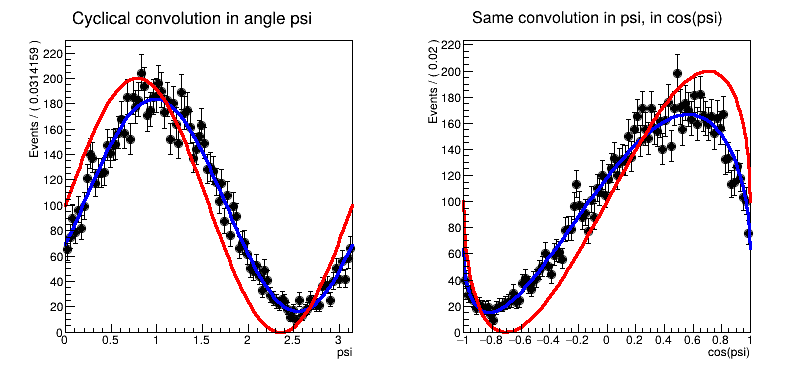

In [21]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()